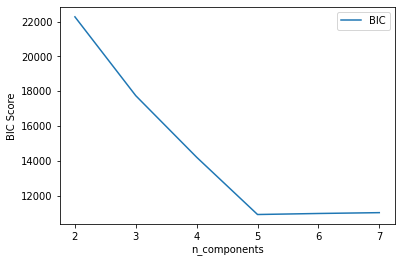

Likely # of Races: 5


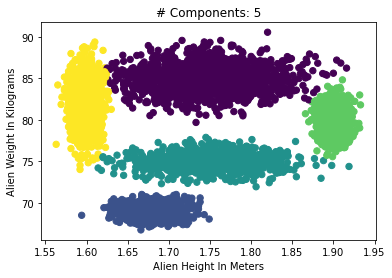

**********
Alien Race: 0
Mean Height: 1.749941189573255
Mean Weight: 84.99773965654391
Stan. Dev: 0.698431691523088
**********
Alien Race: 1
Mean Height: 1.6799381991251507
Mean Weight: 69.00714175024133
Stan. Dev: 0.30712413664134686
**********
Alien Race: 2
Mean Height: 1.7509433716602518
Mean Weight: 74.96371951999
Stan. Dev: 0.4444227687117159
**********
Alien Race: 3
Mean Height: 1.9001462869725336
Mean Weight: 80.00141955797027
Stan. Dev: 0.6519655016636434
**********
Alien Race: 4
Mean Height: 1.5994105656073236
Mean Weight: 81.9850861286434
Stan. Dev: 1.1162213045019167


In [4]:
'''
    Gaussian Mixture Model for alien races
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split


if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/aliens.csv")
    shuffled_data = data_file.sample(frac=1)
    X = shuffled_data # Features

    models = []
    for n in range(2,8):
        gmm = GMM(n_components=n).fit(X)
        labels = gmm.predict(X)
        models.append(gmm)

    BIC_scores = [m.bic(X) for m in models]
    plt.plot(range(2,8), BIC_scores, label='BIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.ylabel('BIC Score')
    plt.show()
    print("Likely # of Races: " + str(BIC_scores.index(min(BIC_scores)) + 2))
    optimal_n = BIC_scores.index(min(BIC_scores)) + 2

    gmm = GMM(n_components=optimal_n).fit(X)
    labels = gmm.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis')
    plt.xlabel('Alien Height In Meters')
    plt.ylabel('Alien Weight In Kilograms')
    title = '# Components: ' + str(optimal_n)
    plt.title(title)
    plt.show()
    means = gmm.means_
    weights = gmm.weights_
    cov = gmm.covariances_
    stds = [ np.sqrt(  np.trace(cov[i])/optimal_n) for i in range(0,optimal_n) ]

    for i in range(0, optimal_n):
        print('**********')
        print('Alien Race: ' + str(i))
        print('Mean Height: ' + str(means[i][0]))
        print('Mean Weight: ' + str(means[i][1]))
        print('Stan. Dev: ' + str(stds[i]))